# Body Fitness Prediction

# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import pickle

# Importing Dataset

In [2]:
#Reading dataset
df=pd.read_csv(r"C:\Users\pavan\Downloads\Internship2020\Project\BodyFitnessPrediction.csv")
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,500,64
670,07-08-2019,2127,200,87,5,0,64


# Label Encoding

1. "Mood" and "bool_of_active" are categorical variables but they are represented as   
--> bool_of_active : Active - 500 and Inactive - 0  
--> mood : 100 - sad, 200 - neutral and 300 - happy
2. Encode mood values as    
--> 100 - 0, 200 - 1 and 300 - 2
3. Encode bool_of_active values as    
--> 0 - 0 and 500 - 1

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['bool_of_active']=le.fit_transform(df['bool_of_active'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,1,64
670,07-08-2019,2127,200,87,5,0,64


In [4]:
df['mood']=le.fit_transform(df['mood'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,1,181,5,0,66
1,07-10-2017,6041,0,197,8,0,66
2,08-10-2017,25,0,0,5,0,66
3,09-10-2017,5461,0,174,4,0,66
4,10-10-2017,6915,1,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,0,4,3,0,64
668,05-08-2019,153,2,4,8,0,64
669,06-08-2019,500,1,7,5,1,64
670,07-08-2019,2127,1,87,5,0,64


# Dependent and Independent variables

In [5]:
#Independent variables
x=df.iloc[:,[1,2,3,4,6]]
x

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,1,181,5,66
1,6041,0,197,8,66
2,25,0,0,5,66
3,5461,0,174,4,66
4,6915,1,223,5,66
...,...,...,...,...,...
667,133,0,4,3,64
668,153,2,4,8,64
669,500,1,7,5,64
670,2127,1,87,5,64


In [6]:
#Dependent Variable
y=df.iloc[:,5]
y

0      0
1      0
2      0
3      0
4      1
      ..
667    0
668    0
669    1
670    0
671    1
Name: bool_of_active, Length: 672, dtype: int64

# Onehot encoding : 

sad(0) --> 0 0   
neutral(1) --> 1 0   
happy(2) --> 0 1  

In [7]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[1])
x=oh.fit_transform(x).toarray()  

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [8]:
x

array([[  0.,   1.,   0., ..., 181.,   5.,  66.],
       [  1.,   0.,   0., ..., 197.,   8.,  66.],
       [  1.,   0.,   0., ...,   0.,   5.,  66.],
       ...,
       [  0.,   1.,   0., ...,   7.,   5.,  64.],
       [  0.,   1.,   0., ...,  87.,   5.,  64.],
       [  0.,   0.,   1., ...,  98.,   5.,  64.]])

In [9]:
x=x[:,1:]
x

array([[1.000e+00, 0.000e+00, 5.464e+03, 1.810e+02, 5.000e+00, 6.600e+01],
       [0.000e+00, 0.000e+00, 6.041e+03, 1.970e+02, 8.000e+00, 6.600e+01],
       [0.000e+00, 0.000e+00, 2.500e+01, 0.000e+00, 5.000e+00, 6.600e+01],
       ...,
       [1.000e+00, 0.000e+00, 5.000e+02, 7.000e+00, 5.000e+00, 6.400e+01],
       [1.000e+00, 0.000e+00, 2.127e+03, 8.700e+01, 5.000e+00, 6.400e+01],
       [0.000e+00, 1.000e+00, 2.203e+03, 9.800e+01, 5.000e+00, 6.400e+01]])

# Splitting dataset into train and test sets (90-10) : 

In [10]:
#Splitting the dataset into Train set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)
x_train1=x_train
x_test1=x_test

# Feature Scaling

In [11]:
#Apply normalization to rescale the features to a standard range of values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
x_train

array([[ 1.68011452, -0.94207218, -1.15992048, -1.26376434, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978,  0.07183731,  0.05451824, -0.24541261,
        -0.42761284],
       [ 1.68011452, -0.94207218,  0.66492329,  0.64353811, -0.85540938,
         1.24951803],
       ...,
       [-0.59519752,  1.06148978,  1.17294701,  1.17646086, -0.24541261,
         2.92664889],
       [-0.59519752, -0.94207218, -0.84833886, -0.87108442,  0.36458416,
        -0.42761284],
       [-0.59519752, -0.94207218, -1.04102131, -0.9692544 , -0.24541261,
        -0.42761284]])

In [13]:
x_test

array([[-0.59519752, -0.94207218,  0.54273442,  0.489271  ,  0.36458416,
         2.92664889],
       [ 1.68011452, -0.94207218, -1.25767158, -1.20766721, -0.24541261,
        -0.42761284],
       [-0.59519752, -0.94207218, -0.65236672, -0.67474446, -0.24541261,
         1.24951803],
       [-0.59519752, -0.94207218, -1.01893332, -1.01132725, -0.85540938,
        -0.42761284],
       [ 1.68011452, -0.94207218,  0.28519788,  0.26488248, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978,  2.09312319,  2.04596638,  1.5845777 ,
        -0.42761284],
       [-0.59519752,  1.06148978,  0.67197264,  0.71365953, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978,  0.04598967,  0.02646967, -0.85540938,
        -0.42761284],
       [ 1.68011452, -0.94207218,  1.65982266,  1.61121362, -0.24541261,
        -0.42761284],
       [ 1.68011452, -0.94207218,  0.08922573,  0.05451824, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978, -1.14159215, -1.

# Model Buiding : 

# Testing Model

# 1. KNN Classification

In [20]:
#Loading model
knn=pickle.load(open('knnmodel.pkl','rb'))

In [21]:
knn_y_test=knn.predict(x_test1)
knn_y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [22]:
knn.score(x_test1,y_test)*100

85.29411764705883

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knn_cm_test = confusion_matrix(y_test,knn_y_test)
knn_cm_test

array([[31,  7],
       [ 3, 27]], dtype=int64)

In [24]:
#Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
knn_acc = cross_val_score(knn, x_test1, y_test, cv=5, scoring='accuracy', n_jobs=-1)
knn_proba = cross_val_predict(knn, x_test1, y_test, cv=5, method='predict_proba')
knn_scores = knn_proba[:, 1]

In [25]:
knn_acc*100

array([78.57142857, 71.42857143, 64.28571429, 76.92307692, 84.61538462])

In [26]:
knn_acc.mean()*100

75.16483516483517

**Evaluation :**

In [27]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, roc_curve

print("\nAccuracy score: %f\n" %(accuracy_score(y_test, knn_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, knn_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, knn_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, knn_y_test) * 100))
print("Confusion matrix : ")
print(confusion_matrix(y_test, knn_y_test))


Accuracy score: 85.294118

ROC score : 85.789474

Precision score : 79.411765

Recall score : 90.000000

Confusion matrix : 
[[31  7]
 [ 3 27]]


# 2. Logistic Regression Classification

In [513]:
lg=pickle.load(open('lgmodel.pkl','rb'))

In [514]:
lg_y_test = lg.predict(x_test1)
lg_y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [515]:
lg.score(x_test1,y_test)*100

80.88235294117648

In [516]:
confusion_matrix(y_test, lg_y_test)

array([[31,  7],
       [ 6, 24]], dtype=int64)

In [517]:
lg_acc = cross_val_score(lg, x_test1, y_test, cv=5, scoring='accuracy', n_jobs=-1)
lg_proba = cross_val_predict(lg, x_test1, y_test, cv=5, method='predict_proba')
lg_scores = lg_proba[:, 1]

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [518]:
lg_acc*100

array([78.57142857, 78.57142857, 64.28571429, 76.92307692, 76.92307692])

In [519]:
lg_acc.mean()*100

75.05494505494505

**Evaluation :**

In [520]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,lg_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, lg_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, lg_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, lg_y_test) * 100))
print("Confusion matrix : ")
print(confusion_matrix(y_test, lg_y_test))


Accuracy score: 80.882353

ROC score : 80.789474

Precision score : 77.419355

Recall score : 80.000000

Confusion matrix : 
[[31  7]
 [ 6 24]]


# 3. Naive Bayes Classification

In [521]:
nb=pickle.load(open('nbmodel.pkl','rb'))

In [522]:
nb_y_test = nb.predict(x_test)  #for test
nb_y_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [523]:
nb.score(x_test,y_test)*100

82.35294117647058

In [524]:
confusion_matrix(y_test,nb_y_test)

array([[30,  8],
       [ 4, 26]], dtype=int64)

In [525]:
nb_acc = cross_val_score(nb, x_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb, x_test, y_test, cv=3, method='predict_proba')
nb_scores = nb_proba[:, 1]

In [526]:
nb_acc*100

array([86.95652174, 52.17391304, 77.27272727])

In [527]:
nb_acc.mean()*100

72.13438735177866

**Evaluation :**

In [528]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,nb_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, nb_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, nb_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, nb_y_test) * 100))
print("Confusion matrix : ")
print(confusion_matrix(y_test, nb_y_test))


Accuracy score: 82.352941

ROC score : 82.807018

Precision score : 76.470588

Recall score : 86.666667

Confusion matrix : 
[[30  8]
 [ 4 26]]


# 4. Support Vector Machines Classification

In [529]:
svc=pickle.load(open('svcmodel.pkl','rb'))

In [530]:
svc_y_test = svc.predict(x_test)
svc_y_test

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [531]:
svc.score(x_test,y_test)*100

73.52941176470588

In [532]:
svc_cm_test = confusion_matrix(y_test, svc_y_test)   
svc_cm_test

array([[26, 12],
       [ 6, 24]], dtype=int64)

In [533]:
svm_acc = cross_val_score(svc, x_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)
svm_proba = cross_val_predict(svc, x_test, y_test, cv=3, method='predict_proba')
svm_scores = svm_proba[:, 1]

In [534]:
svm_acc*100

array([86.95652174, 69.56521739, 77.27272727])

In [535]:
svm_acc.mean()*100

77.931488801054

**Evaluation :**

In [536]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,svc_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, svc_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, svc_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, svc_y_test) * 100))
print("Confusion matrix :")
print(confusion_matrix(y_test, svc_y_test))


Accuracy score: 73.529412

ROC score : 74.210526

Precision score : 66.666667

Recall score : 80.000000

Confusion matrix :
[[26 12]
 [ 6 24]]


# 5. Decision Tree Classification

In [537]:
dtc=pickle.load(open('dtcmodel.pkl','rb'))

In [538]:
dtc.score(x_test,y_test)*100

82.35294117647058

In [539]:
dtc_y_test=dtc.predict(x_test)
dtc_y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [540]:
confusion_matrix(y_test, dtc_y_test)

array([[33,  5],
       [ 7, 23]], dtype=int64)

In [541]:
#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc, x_test, y_test, cv=6, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc, x_test, y_test, cv=6, method='predict_proba')
dtc_scores = dtc_proba[:, 1]

In [542]:
dtc_clf_acc*100

array([91.66666667, 58.33333333, 54.54545455, 81.81818182, 54.54545455,
       81.81818182])

In [543]:
dtc_clf_acc.mean()*100

70.45454545454545

**Evaluation :**

In [544]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,dtc_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, dtc_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, dtc_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, dtc_y_test) * 100))
print("Confusion matrix : ")
print(confusion_matrix(y_test, dtc_y_test)) 


Accuracy score: 82.352941

ROC score : 81.754386

Precision score : 82.142857

Recall score : 76.666667

Confusion matrix : 
[[33  5]
 [ 7 23]]


# 6. Random Forest Classification

In [545]:
rmf=pickle.load(open('rmfmodel.pkl','rb'))

In [546]:
rmf.score(x_test,y_test)*100

80.88235294117648

In [547]:
rmf_y_test=rmf.predict(x_test)
rmf_y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [548]:
confusion_matrix(y_test, rmf_y_test)

array([[30,  8],
       [ 5, 25]], dtype=int64)

In [549]:
rmf_clf_acc = cross_val_score(rmf, x_test, y_test, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf, x_test, y_test, cv=3, method='predict_proba')
rmf_scores = rmf_proba[:, 1]

In [550]:
rmf_clf_acc*100

array([82.60869565, 73.91304348, 68.18181818])

In [551]:
rmf_clf_acc.mean()*100

74.90118577075097

**Evaluation :**

In [552]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,rmf_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, rmf_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, rmf_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, rmf_y_test) * 100))
print("Confusion matrix :")
print(confusion_matrix(y_test, rmf_y_test)) 


Accuracy score: 80.882353

ROC score : 81.140351

Precision score : 75.757576

Recall score : 83.333333

Confusion matrix :
[[30  8]
 [ 5 25]]


# 7. Gradient Boosting Classification

In [28]:
gb=pickle.load(open('gbmodel.pkl','rb'))

In [29]:
gb.score(x_test,y_test)*100

89.70588235294117

In [30]:
gb_y_test=gb.predict(x_test)
gb_y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [31]:
confusion_matrix(y_test, gb_y_test)

array([[34,  4],
       [ 3, 27]], dtype=int64)

In [32]:
gb_clf_acc = cross_val_score(gb, x_test, y_test, cv=5, scoring="accuracy",  n_jobs=-1)
gb_proba = cross_val_predict(gb, x_test, y_test, cv=5, method='predict_proba')
gb_scores = gb_proba[:, 1]

In [33]:
gb_clf_acc*100

array([92.85714286, 92.85714286, 57.14285714, 76.92307692, 76.92307692])

In [34]:
gb_clf_acc.mean()*100

79.34065934065934

**Evaluation :**

In [35]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,gb_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, gb_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, gb_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, gb_y_test) * 100))
print("Confusion matrix :")
print(confusion_matrix(y_test, gb_y_test)) 


Accuracy score: 89.705882

ROC score : 89.736842

Precision score : 87.096774

Recall score : 90.000000

Confusion matrix :
[[34  4]
 [ 3 27]]


# ROC Curves on Test data : 

In [595]:
def ROC_curve(title, y_test, scores, y_test_pred, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_test, scores)*100))
    print()
    print('Test Accuracy : ',accuracy_score(y_test,y_test_pred)*100)
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 76.71 

Test Accuracy :  85.29411764705883


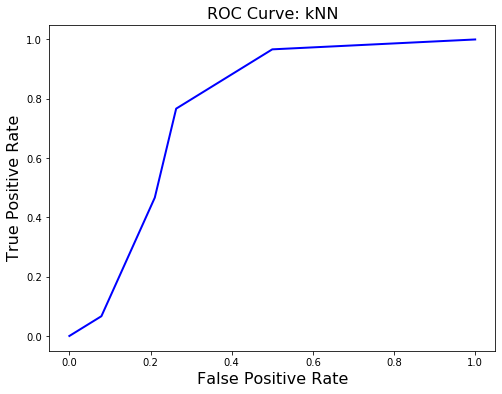

AUC Score (Logistic Regression): 78.77 

Test Accuracy :  80.88235294117648


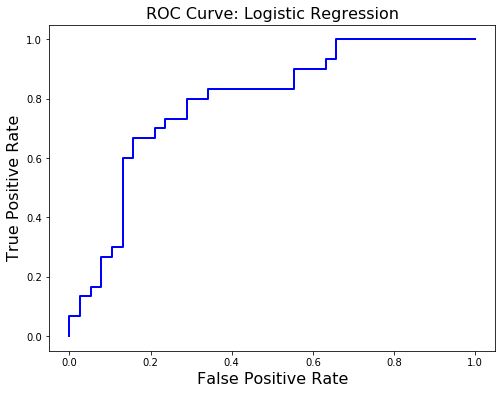

AUC Score (Naive Bayes): 74.25 

Test Accuracy :  82.35294117647058


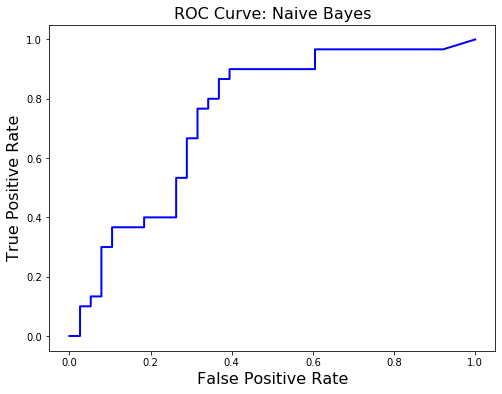

AUC Score (Support Vector Classifiaction): 83.51 

Test Accuracy :  73.52941176470588


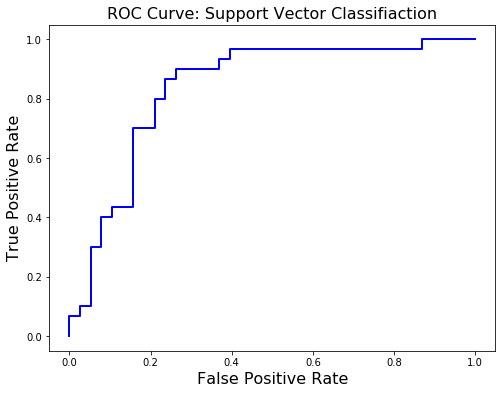

AUC Score (Decision Tree Calssifier): 69.43 

Test Accuracy :  82.35294117647058


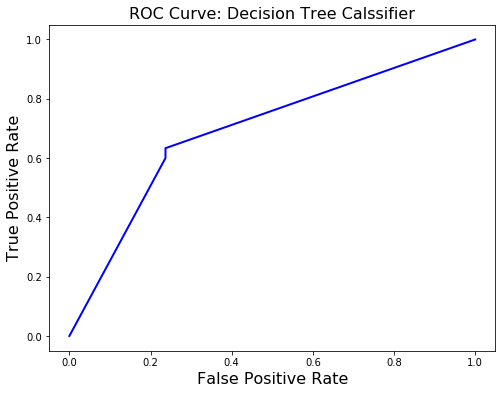

AUC Score (Random Forest Classifier): 82.85 

Test Accuracy :  80.88235294117648


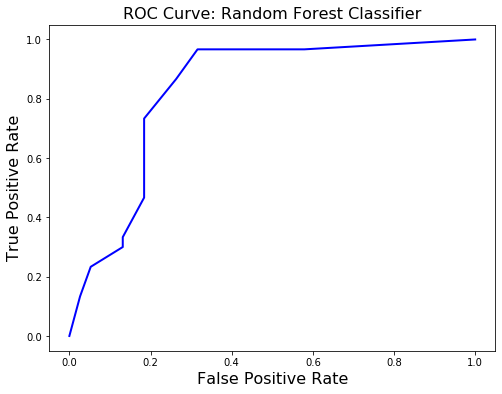

AUC Score (Gradient Boosting Classifier): 80.39 

Test Accuracy :  89.70588235294117


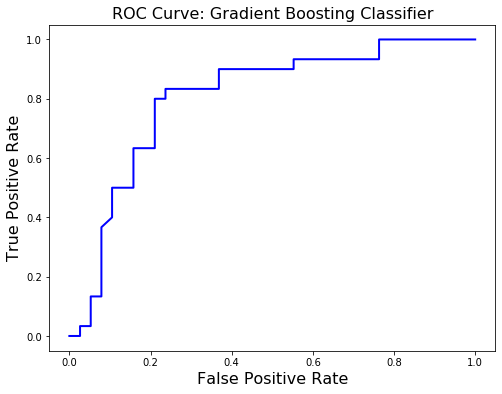

In [596]:
ROC_curve('kNN',y_test,knn_scores,knn_y_test)
ROC_curve('Logistic Regression',y_test,lg_scores,lg_y_test)
ROC_curve('Naive Bayes',y_test,nb_scores,nb_y_test)
ROC_curve('Support Vector Classifiaction',y_test,svm_scores,svc_y_test)
ROC_curve('Decision Tree Calssifier',y_test,dtc_scores,dtc_y_test)
ROC_curve('Random Forest Classifier',y_test,rmf_scores,rmf_y_test)
ROC_curve('Gradient Boosting Classifier',y_test,gb_scores,gb_y_test)

# Observations : 

**Top performance Algorithms on test data :**  
1. Gradient Boosting Classifier
2. Random Forest Classifier
3. Logistic Regression Classifier
4. Support Vector Classifier

**On this test data, *Gradient Boosting Classifer* gives more accuracy and good ROC score.**

# Predicting new values : 

In [38]:
gb_y_new1 = gb.predict(scaler.transform(np.array([[0,0,6041,197,8,66]])))

In [39]:
gb_y_new1

array([0], dtype=int64)

Inactive

In [40]:
gb_y_new2 = gb.predict(scaler.transform(np.array([[1,0,6915,223,5,66]])))

In [41]:
gb_y_new2

array([1], dtype=int64)

Active